In [1]:
import pandas as pd
from rectools import Columns

# Load and split dataset
Here we use data with users' and movies' features

In [2]:
import utils
df_train, user_features_train, item_features_train, df_test = utils.read_split_rating_dataset_with_features(
    '../data/interim/rating.csv', '../data/interim/user.csv', '../data/interim/movie.csv')

In [3]:
from rectools.dataset import Dataset
from rectools.models import ImplicitALSWrapperModel
from implicit.als import AlternatingLeastSquares

# Fit model and generate recommendations for all users
dataset = Dataset.construct(
    df_train,
    user_features_df=user_features_train,  # our flatten dataframe
    item_features_df=item_features_train,  # our flatten dataframe
    cat_user_features=["gender", "occupation"], # these will be one-hot-encoded. All other features must be numerical already
    make_dense_user_features=False,  # for `sparse` format
    make_dense_item_features=False,  # for `sparse` format
)

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


# ALS model - Grid Search

Now we will train ALS model, and use grid search, to find best hyperparameters.

In [4]:
RANDOM_STATE = 420
K = 10

In [5]:
from rectools.metrics import MAP, calc_metrics, MeanInvUserFreq, Serendipity

metrics_name = {
    'MAP': MAP,
    'MIUF': MeanInvUserFreq,
    'Serendipity': Serendipity
}
metrics = {}
for metric_name, metric in metrics_name.items():
    for k in (1, 5, 10):
        metrics[f'{metric_name}@{k}'] = metric(k=k)

# Source: https://github.com/MobileTeleSystems/RecTools/blob/main/examples/5_benchmark_iALS_with_features.ipynb

catalog = df_train[Columns.Item].unique()

In [6]:
# AlternatingLeastSquares(
#     factors=14,
#     regularization=0.0001,
#     random_state=420,
#     use_gpu=False,
#     iterations=12
# )

In [7]:
alphas = [0.1, 1]
regularizations = [0.01, 0.001, 0.0001]
factors = [10, 15, 20]
iterations = [10, 12, 15]

results = []

for alpha in alphas:
    for regularization in regularizations:
        for n_factors in factors:
            for itera in iterations:
                model_name = f"factors_{n_factors}_alpha_{alpha}_reg_{regularization}_iter_{itera}"
                model = ImplicitALSWrapperModel(
                    AlternatingLeastSquares(
                        factors=n_factors,
                        regularization=regularization,
                        random_state=RANDOM_STATE,
                        alpha=alpha,
                        use_gpu=False,
                        iterations=itera
                    )
                )
                model.fit(dataset)
                recos = model.recommend(
                    users=df_train[Columns.User].unique(),
                    dataset=dataset,
                    k=K,
                    filter_viewed=True,
                )
                metric_values = calc_metrics(
                    metrics,
                    reco=recos,
                    interactions=df_test,
                    prev_interactions=df_train,
                    catalog=catalog
                )
                metric_values["model"] = model_name
                results.append(metric_values)

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 10 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
pure_df = pd.DataFrame(results).set_index("model").sort_values(by=["MAP@10", "Serendipity@10"], ascending=False)
pure_df.head(5)

,MAP@1,MAP@5,MAP@10,MIUF@1,MIUF@5,MIUF@10,Serendipity@1,Serendipity@5,Serendipity@10
model,,,,,,,,,
factors_15_alpha_1_reg_0.01_iter_12,0.02746,0.044362,0.055670,1.499135,1.656277,1.783688,0.000925,0.000841,0.000828
factors_15_alpha_1_reg_0.01_iter_10,0.02746,0.044745,0.055597,1.494964,1.658958,1.781938,0.000925,0.000859,0.000837
factors_15_alpha_1_reg_0.001_iter_10,0.02746,0.044071,0.055593,1.495130,1.655964,1.783306,0.000925,0.000803,0.000828
factors_15_alpha_1_reg_0.0001_iter_10,0.02746,0.044086,0.055567,1.494528,1.656685,1.782404,0.000925,0.000803,0.000818
factors_15_alpha_1_reg_0.001_iter_12,0.02746,0.043920,0.055461,1.495940,1.654292,1.785533,0.000925,0.000803,0.000830


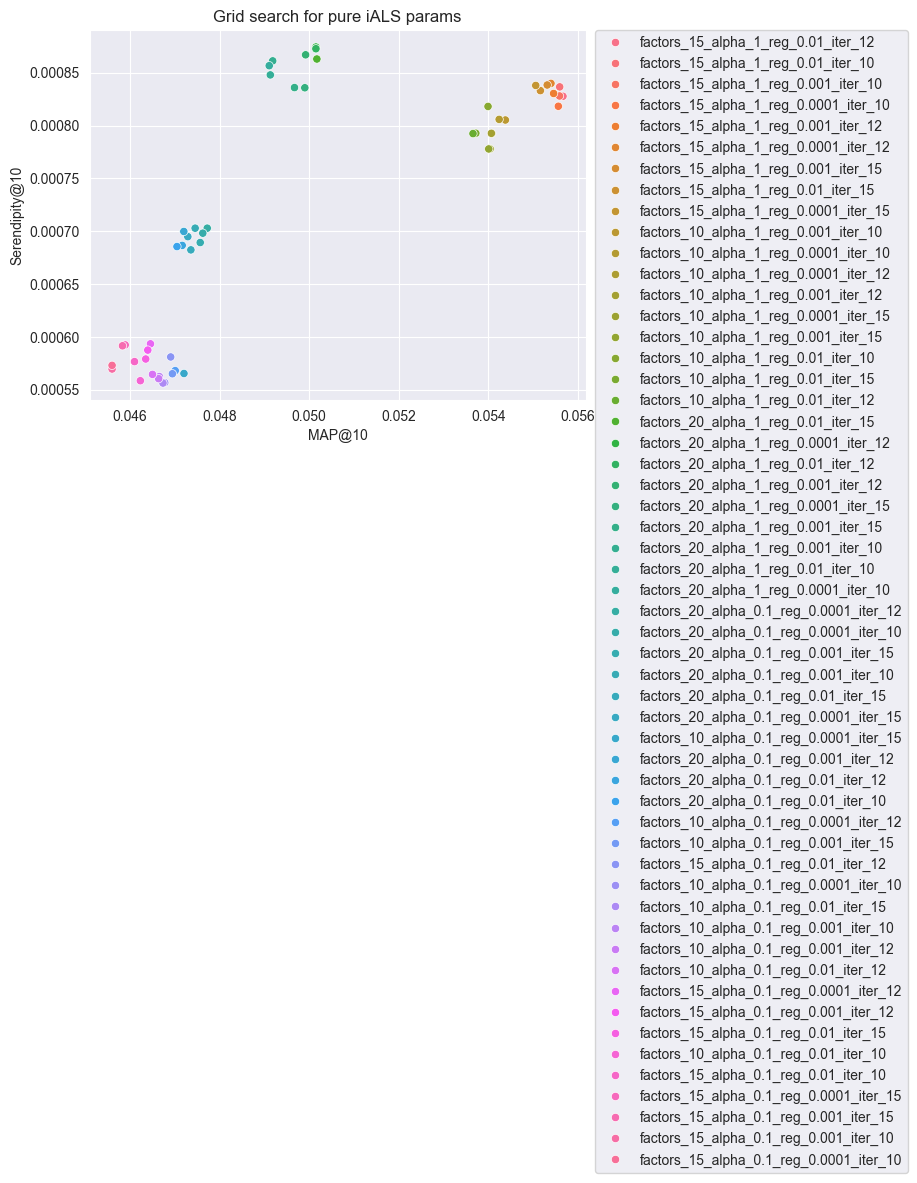

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data = pure_df, x="MAP@10", y="Serendipity@10", hue="model", legend=True)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title("Grid search for pure iALS params")
plt.show()

## Choose best model
Let's choose best model and check it's recommendations

In [10]:
model = ImplicitALSWrapperModel(
    AlternatingLeastSquares(
        factors=15,
        regularization=0.01,
        random_state=RANDOM_STATE,
        alpha=1,
        use_gpu=False,
        iterations=12
    )
)
model.fit(dataset)
recos = model.recommend(
    users=df_train[Columns.User].unique(),
    dataset=dataset,
    k=K,
    filter_viewed=True,
)

/Users/artembatalov/miniconda3/envs/movie-recsys/lib/python3.10/site-packages/rectools/dataset/features.py:420: UserWarning: Converting sparse features to dense array may cause MemoryError
  warnings.warn("Converting sparse features to dense array may cause MemoryError")


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
df_test.user_id.value_counts()

94     318
864    262
393    234
416    209
64     175
      ... 
654      1
454      1
790      1
838      1
913      1
Name: user_id, Length: 120, dtype: int64

In [31]:
USER_ID = 94

In [32]:
recos[recos.user_id == USER_ID]

,user_id,item_id,score,rank
1980,94,56,2.439799,1
1981,94,50,2.377061,2
1982,94,176,2.347356,3
1983,94,318,2.314595,4
1984,94,98,2.126038,5
1985,94,183,2.049443,6
1986,94,204,1.982299,7
1987,94,121,1.957620,8
1988,94,651,1.921060,9
1989,94,286,1.858509,10


In [33]:
inter = set(df_test[df_test.user_id == USER_ID].item_id) & set(recos[recos.user_id == USER_ID].item_id)

In [34]:
df_test[df_test.user_id == USER_ID][df_test.item_id.isin(inter)]

/var/folders/br/x34nk3k51rvd171z3m5bcwd40000gn/T/ipykernel_81828/1681985334.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test[df_test.user_id == USER_ID][df_test.item_id.isin(inter)]


,user_id,item_id,weight,datetime
1303,94,651,5,1998-04-04 21:28:52
8123,94,50,5,1998-04-04 20:16:36
20444,94,318,5,1998-04-04 20:19:51
24346,94,176,4,1998-04-04 20:09:30
26569,94,56,5,1998-04-04 21:28:51
28514,94,183,5,1998-04-04 20:15:21
30296,94,204,4,1998-04-04 20:21:57
35813,94,98,4,1998-04-04 20:19:52
47298,94,286,4,1998-04-04 21:08:42
48548,94,121,2,1998-04-04 20:30:15


In [35]:
recos[recos.user_id == USER_ID][recos.item_id.isin(inter)]

/var/folders/br/x34nk3k51rvd171z3m5bcwd40000gn/T/ipykernel_81828/3435006634.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recos[recos.user_id == USER_ID][recos.item_id.isin(inter)]


,user_id,item_id,score,rank
1980,94,56,2.439799,1
1981,94,50,2.377061,2
1982,94,176,2.347356,3
1983,94,318,2.314595,4
1984,94,98,2.126038,5
1985,94,183,2.049443,6
1986,94,204,1.982299,7
1987,94,121,1.957620,8
1988,94,651,1.921060,9
1989,94,286,1.858509,10


Satisfied with results, but the problem with items that the user has already seen, but rated poorly, is still relevant. So further we will try to solve it.

Let's save model now.

In [36]:
# Save artifact
import pickle
with open('../models/als_model.pkl', 'wb') as f:
    pickle.dump(model, f)